In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
nfcs_1 = pd.read_csv("../data/raw/NFCS 2009 State Data 130425.csv")
nfcs_2 = pd.read_csv("../data/raw/NFCS 2012 State Data 130503.csv")
nfcs_3 = pd.read_csv("../data/raw/NFCS 2015 State Tracking Data 160619.csv")
nfcs_4 = pd.read_csv("../data/raw/NFCS 2018 State Data 190603.csv")

C:\Users\Desmond\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14,16,31,35,38,50,51,52,53,54,55,56,70,71,72,73,74,75,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
nfcs_dfs = [nfcs_1,nfcs_2,nfcs_3,nfcs_4]

In [4]:
for df in nfcs_dfs:
    display(df.head())

,respid,stateq,censusdiv,censusreg,a3,a3ar_w,a3b,a4a_new_w,a5,a6,...,m1_3,m4,m6,m7,m8,m9,m10,wgt_s3,wgt_n2,wgt_d2
0,57,7,1,1,2,4,10,2,1,1,...,3,6,99,3,1,1,2,1.247684,0.510810,1.887200
1,130,22,1,1,1,5,5,1,5,2,...,5,5,3,3,1,1,2,0.791143,0.293528,2.054242
2,144,7,1,1,2,5,11,1,2,5,...,5,5,1,2,2,1,98,1.245151,0.530780,1.880146
3,191,22,1,1,1,5,5,1,5,1,...,4,6,2,3,2,1,2,0.791143,0.293528,2.054242
4,217,22,1,1,2,5,11,1,3,2,...,7,5,1,98,1,1,2,1.357932,0.530780,3.629356


,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2012,A6,...,M21_4,M22,M6,M7,M8,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2012010001,24,4,2,2,5,11,1,6,4,...,,1,1,3,4,1,2,0.363417,1.260305,0.631540
1,2012010002,10,5,3,2,5,11,1,4,1,...,,1,1,98,98,98,98,1.173593,2.956766,1.005697
2,2012010003,23,3,2,2,6,12,1,4,4,...,,1,1,3,98,1,2,1.577671,1.168197,1.025873
3,2012010004,14,3,2,2,6,12,1,2,5,...,,1,2,98,98,98,98,1.577671,1.531504,1.179334
4,2012010005,44,7,3,2,2,8,2,4,1,...,,1,1,2,98,1,1,2.167569,2.524668,0.926108


,TRACK,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A6,...,M21_3,M21_4,M6,M7,M8,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2015,2015010001,3,8,4,1,6,6,1,4,...,,,3,3,98,1,98,0.536725,2.758128,1.287577
1,2015,2015010002,36,3,2,2,5,11,1,5,...,,,1,3,98,1,98,1.663579,1.587114,1.022437
2,2015,2015010003,33,2,1,2,2,8,1,1,...,,,1,98,98,1,98,0.708960,0.823015,0.823240
3,2015,2015010004,10,5,3,2,3,9,2,4,...,,,3,98,98,1,98,2.031946,2.983356,1.020086
4,2015,2015010005,31,2,1,1,5,5,1,2,...,,,1,98,98,1,2,2.521054,0.980330,1.145100


,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M42,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018010001,48,9,4,2,5,11,1,5,4,...,,1,3,98,98,98,1,0.683683,0.519642,1.095189
1,2018010002,10,5,3,2,2,8,1,6,1,...,,1,3,98,3,1,98,0.808358,2.516841,0.922693
2,2018010003,44,7,3,2,2,8,1,6,1,...,,1,1,98,98,1,98,1.021551,1.896192,0.671093
3,2018010004,10,5,3,2,1,7,1,6,2,...,7,98,98,4,4,2,98,0.808358,2.516841,0.922693
4,2018010005,13,8,4,1,2,2,1,6,1,...,,1,3,98,2,1,98,0.448075,0.614733,1.232221


In [5]:
nfcs_new = nfcs_1[["stateq", "b1", "g5_1", "g5_2", "g5_4", "g5_5"]]

In [6]:
nfcs_2['YEAR'] = 2012
nfcs_3['YEAR'] = 2015
nfcs_4['YEAR'] = 2018

In [7]:
nfcs_new.rename(columns = {"stateq": "STATEQ", "b1" : "B1", "g5_1" : "G25_1", "g5_2" : "G25_2", "g5_4" : "G25_4", "g5_5" : "G25_5"}, inplace = True)

C:\Users\Desmond\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
nfcs_new

,STATEQ,B1,G25_1,G25_2,G25_4,G25_5
0,7,99,2,2,1,1
1,22,1,2,2,2,2
2,7,1,2,2,2,2
3,22,1,2,2,2,2
4,22,1,2,2,2,2
...,...,...,...,...,...,...
28141,38,2,2,2,1,2
28142,38,2,2,2,2,2
28143,12,1,1,1,1,1
28144,2,2,2,2,2,2


In [9]:
frames = [nfcs_2, nfcs_3, nfcs_4]

nfcs_monster = pd.concat(frames)

In [10]:
nfcs_monsterr = nfcs_monster[["STATEQ", "B1", "G25_1", "G25_2", "G25_4", "G25_5", "YEAR"]]

In [11]:
nfcs_monsterr

,STATEQ,B1,G25_1,G25_2,G25_4,G25_5,YEAR
0,24,1,1,1,1,1,2012
1,10,1,1,1,1,1,2012
2,23,1,1,1,1,1,2012
3,14,1,1,1,1,1,2012
4,44,1,1,2,2,5,2012
...,...,...,...,...,...,...,...
27086,51,1,1,1,1,1,2018
27087,20,99,1,1,99,1,2018
27088,20,2,1,5,1,1,2018
27089,20,1,5,5,4,2,2018


In [12]:
nfcs_monsterr.shape

(133819, 7)

In [13]:
nfcs_monsterr.describe()

,STATEQ,B1,YEAR
count,133819.000000,133819.000000,133819.000000
mean,26.162518,2.757000,2015.035466
std,14.740317,12.704415,1.880527
min,1.000000,1.000000,2012.000000
25%,13.000000,1.000000,2015.000000
50%,26.000000,1.000000,2015.000000
75%,39.000000,1.000000,2015.000000
max,51.000000,99.000000,2018.000000


In [14]:
nfcs_monsterr.sum()

STATEQ      3501042
B1           368939
YEAR      269650031
dtype: int64

In [15]:
nfcs_monsterr.isnull().sum()/len(nfcs_monsterr)*100

STATEQ    0.0
B1        0.0
G25_1     0.0
G25_2     0.0
G25_4     0.0
G25_5     0.0
YEAR      0.0
dtype: float64

In [16]:
nfcs_monsterr.YEAR.value_counts()

2015    81219
2018    27091
2012    25509
Name: YEAR, dtype: int64

In [17]:
nfcs_monsterr.shape

(133819, 7)

In [18]:
for i in list(nfcs_monsterr.YEAR.unique()):
    print(i)
    display(nfcs_monsterr[nfcs_monsterr.YEAR == i].isnull().sum()/len(nfcs_monsterr)*100)

2012


STATEQ    0.0
B1        0.0
G25_1     0.0
G25_2     0.0
G25_4     0.0
G25_5     0.0
YEAR      0.0
dtype: float64

2015


STATEQ    0.0
B1        0.0
G25_1     0.0
G25_2     0.0
G25_4     0.0
G25_5     0.0
YEAR      0.0
dtype: float64

2018


STATEQ    0.0
B1        0.0
G25_1     0.0
G25_2     0.0
G25_4     0.0
G25_5     0.0
YEAR      0.0
dtype: float64

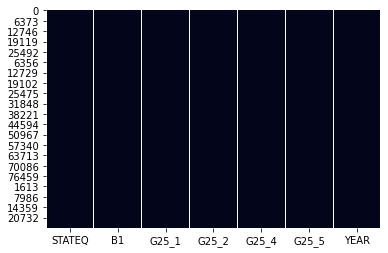

In [19]:
sns.heatmap(nfcs_monsterr.isnull(), cbar=False)

In [20]:
nfcs_monsterr.columns

Index(['STATEQ', 'B1', 'G25_1', 'G25_2', 'G25_4', 'G25_5', 'YEAR'], dtype='object')

In [21]:
nfcs_monsterr.rename(columns = {
                                "STATEQ": "STATE",
                                "B1" : "CHECKING_ACCOUNT",
                                "G25_1" : "AUTO_TITLE_LOAN",
                                "G25_2" : "PAYDAY_LOAN",
                                "G25_3" : "TAX_REFUND",
                                "G25_4" : "PAWN_SHOP",
                                "G25_5" : "RENT_TO_OWN",},
                     inplace = True)

C:\Users\Desmond\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [22]:
nfcs_monsterr

,STATE,CHECKING_ACCOUNT,AUTO_TITLE_LOAN,PAYDAY_LOAN,PAWN_SHOP,RENT_TO_OWN,YEAR
0,24,1,1,1,1,1,2012
1,10,1,1,1,1,1,2012
2,23,1,1,1,1,1,2012
3,14,1,1,1,1,1,2012
4,44,1,1,2,2,5,2012
...,...,...,...,...,...,...,...
27086,51,1,1,1,1,1,2018
27087,20,99,1,1,99,1,2018
27088,20,2,1,5,1,1,2018
27089,20,1,5,5,4,2,2018


In [23]:
checking_account = nfcs_monsterr[["CHECKING_ACCOUNT", "YEAR"]]

In [24]:
checking_account.dtypes

CHECKING_ACCOUNT    int64
YEAR                int64
dtype: object

In [25]:
checking_account.replace({1 : 'YES', 2 : 'NO', 98 : 'DONT_KNOW', 99 : 'PREFER_NOT_TO_SAY'})

,CHECKING_ACCOUNT,YEAR
0,YES,2012
1,YES,2012
2,YES,2012
3,YES,2012
4,YES,2012
...,...,...
27086,YES,2018
27087,PREFER_NOT_TO_SAY,2018
27088,NO,2018
27089,YES,2018


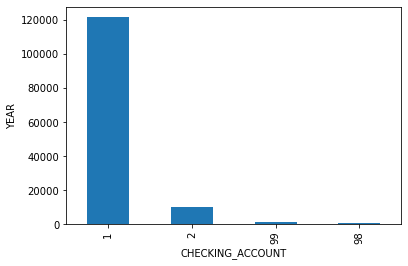

In [26]:
checking_account["CHECKING_ACCOUNT"].value_counts().plot.bar()
plt.xlabel('CHECKING_ACCOUNT')
plt.ylabel('YEAR')
ticklabel = ['YEAR']

In [27]:
nfcs_monsterr.to_csv("../data/processed/NFCS_2009_2018_clean.csv")